In [7]:
import matplotlib.pyplot as plt
import json
import random

In [2]:
# New colormap including gridline color
colors = ['#000000','#1E93FF','#F93C31','#4FCC30','#FFDC00',
'#999999','#E53AA3','#FF851B','#87D8F1','#921231','#555555']
colormap = plt.matplotlib.colors.ListedColormap(colors)

In [3]:
base_path = './kaggle/input/arc-prize-2024/'
# Copied from the starter EDA notebook
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

In [4]:
training_challenges = load_json(base_path + 'arc-agi_training_challenges.json')
training_solutions = load_json(base_path + 'arc-agi_training_solutions.json')

In [ ]:
import json
import random

# 랜덤 값을 생성하여 매핑할 딕셔너리
random_offsets = {}

def augment_value(val):
    if val not in random_offsets:
        # 새로운 값에 대해서만 랜덤 오프셋 생성 (조건 1과 조건 2를 만족)
        offset = random.randint(1, 100)  # 1~100 사이의 랜덤 값
        random_offsets[val] = val + offset
    return random_offsets[val]

def augment_nested_list(nested_list):
    """
    중첩된 리스트 안의 값을 증강 처리하는 함수.
    """
    return [[augment_value(val) for val in inner_list] for inner_list in nested_list]

# 기존 JSON 데이터에 랜덤한 값을 더하는 증강 처리
def augment_data(training_challenges):
    for key, value in training_challenges.items():
        print(f"Processing {key}")

        # 훈련 데이터 증강
        for i, train_case in enumerate(value['train']):
            train_case['input'] = augment_nested_list(train_case['input'])
            train_case['output'] = augment_nested_list(train_case['output'])
            print(f"Train {key}: {i} input augmented: {train_case['input']}")
            print(f"Train {key}: {i} output augmented: {train_case['output']}")


# 증강 처리 함수 호출
augment_data(training_challenges)


Training Challenges Structure:
Key: 007bbfb7
  Key: test
    List of 1 items
    [0]
      Key: input
        List of 3 items
        [0]
          List of 3 items
          [0]
            Value: 7
          [1]
            Value: 0
          [2]
            Value: 7
        [1]
          List of 3 items
          [0]
            Value: 7
          [1]
            Value: 0
          [2]
            Value: 7
        [2]
          List of 3 items
          [0]
            Value: 7
          [1]
            Value: 7
          [2]
            Value: 0
  Key: train
    List of 5 items
    [0]
      Key: input
        List of 3 items
        [0]
          List of 3 items
          [0]
            Value: 0
          [1]
            Value: 7
          [2]
            Value: 7
        [1]
          List of 3 items
          [0]
            Value: 7
          [1]
            Value: 7
          [2]
            Value: 7
        [2]
          List of 3 items
          [0]
            Value: 0
    

KeyboardInterrupt: 

In [10]:
# 랜덤 값을 생성하여 매핑할 딕셔너리
random_offsets = {}

def augment_value(val):
    if val not in random_offsets:
        # 새로운 값에 대해서만 랜덤 오프셋 생성 (조건 1과 조건 2를 만족)
        offset = random.randint(1, 100)  # 1~100 사이의 랜덤 값
        random_offsets[val] = val + offset
    return random_offsets[val]

# 기존 JSON 데이터에 랜덤한 값을 더하는 증강 처리
def augment_data(training_challenges):
    for key, value in training_challenges.items():
        print(f"Processing {key}")

        # 훈련 데이터 증강
        for i, train_case in enumerate(value['train']):
            # train_case['input']와 train_case['output']는 리스트이므로, 각각의 요소에 대해 augment_value 함수를 적용합니다.
            train_case['input'] = [augment_value(x) for x in train_case['input']]
            train_case['output'] = [augment_value(x) for x in train_case['output']]
            print(f"Train {key}: {i} input augmented: {train_case['input']}")
            print(f"Train {key}: {i} output augmented: {train_case['output']}")

# 증강 처리 함수 호출
augment_data(training_challenges)

Processing 007bbfb7


TypeError: unhashable type: 'list'

In [ ]:
task_ids = []
for key, value  in training_challenges.items():
    task_ids.append(key)
    
    print(value['test'][0]['input'])
    for i , _ in enumerate(value['train']):
        print(key,": " ,i)
        print(value['train'][i]['input'])
        print(value['train'][i]['output'])
    

In [ ]:
# Change to display other examples from the training set
example_id = '007bbfb7'

In [ ]:
# Get the grids out of the json maze and convert to tensors
toy_train_x = []
toy_train_y = []
for example in training_challenges[example_id]['train']:
    toy_train_x.append(example['input'])
    toy_train_y.append(example['output'])
toy_valid_x = training_challenges[example_id]['test'][0]['input']
toy_valid_y = training_solutions[example_id][0]

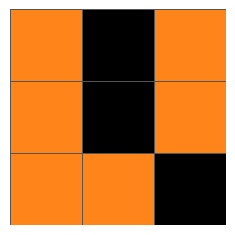

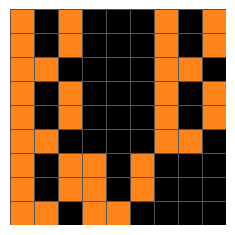

In [ ]:
# Display a single grid
def show_grid(grid):
    fig = plt.figure(figsize=(2.8,2.8))
    ax = plt.gca()
    ax.pcolormesh(grid, edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

show_grid(toy_valid_x)
show_grid(toy_valid_y)

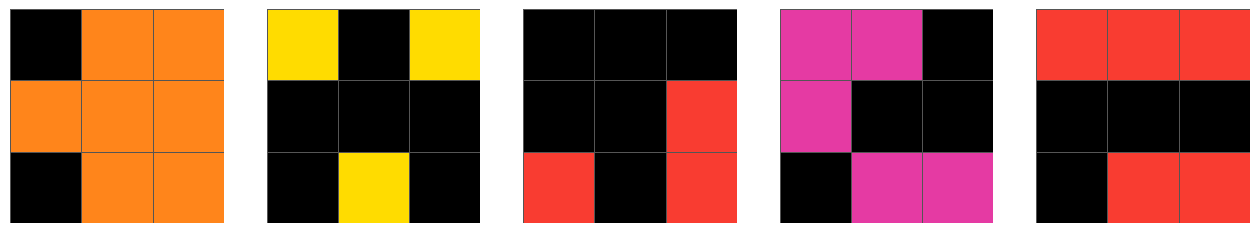

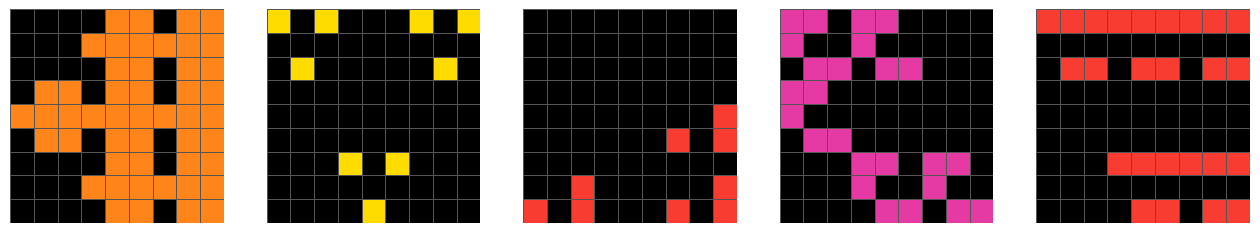

In [ ]:
# Display an array of grids
def show_grids(grids):
    nrows, ncols = 1, max(5, len(grids))
    fig = plt.figure(figsize=(16,16))
    for i, grid in enumerate(grids):
        ax = fig.add_subplot(nrows, ncols, i+1)
        ax.pcolormesh(grid, edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10)
        ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.axis('off')
    plt.show()

show_grids(toy_train_x)
show_grids(toy_train_y)